In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
import numpy as np
import cv2 
import stripes.palette as palette
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

reload(palette)

<module 'stripes.palette' from 'stripes/palette.pyc'>

In [28]:
import os
import pandas as pd

In [29]:
def create_random_stripe(image_name):
    plt.ioff()
    fig = plt.figure(figsize=(12, 2))
    template = np.ones((32, 32, 3))
    color = np.array((255, 255, 255))
    img = (template * color).astype('uint8')
    plt.subplot(1, len(palette.agents_list) + 4, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.text(x=1,y=16,s=os.path.basename(image_name),fontsize=16)
    plt.subplot(1, len(palette.agents_list) + 4, 2)
    plt.imshow(img)
    plt.axis('off')
    
    row_dict = {'N': image_name}
    
    for i,agent in enumerate(palette.agents_list):
        plt.subplot(1, len(palette.agents_list) + 4, 4 + i)
        if agent != 'BLO':
            index = np.random.randint(0, high=len(palette.points_dict[agent]))
        else:
            index = np.random.choice([0, 3, 4, 5, 6])
        template = np.ones((32, 32, 3))
        color = np.array(palette.points_dict[agent][index])
        img = (template * color).astype('uint8')
        plt.imshow(img)
#         plt.title("{}\n{}".format(agent, index))
        plt.axis('off')
        plt.subplots_adjust(wspace=0.1)
        row_dict.update({agent: palette.targets_dict[agent][index]})

    plt.tight_layout()
    
    plt.savefig(image_name,bbox_inches = 'tight',pad_inches=0.1)

    img = cv2.imread(image_name)
    img[0:3,:,:] = 0
    img[:,0:3,:] = 0
    img[:,-3:,:] = 0
    img[-3:,:,:] = 0
    cv2.imwrite(image_name,img)
    plt.close()
    
    return row_dict

In [30]:
!mkdir random_stripes

mkdir: cannot create directory ‘random_stripes’: File exists


In [31]:
path = "random_stripes/"

In [32]:
def generate_stripes(n_to_generate):
    data = pd.DataFrame(columns=['N'] + palette.agents_list)
    
    for i in xrange(100):
        basename = str(i) + '.png'
        full_name = os.path.join(path,basename)
        data = data.append(create_random_stripe(full_name), ignore_index=True)

    return data 

In [33]:
data = generate_stripes(n_to_generate = 100)

In [34]:
data.to_csv(os.path.join(path,"data.csv"), sep=';')

#### TODO: можно сделать генерацию через opencv, так будет гораздо быстрее

## Ахтунг
Ниже идёт **хардкод**, чтобы склеивать только что созданные картинки. Никаких констант. Если нужно что-то более кастомизируемое, то лучше переделать. Для 100 картинок точно нормально работает (можно ещё вариант с генерацией 10 картинок по 10 полосок)

In [35]:
img = cv2.imread(os.path.join(path,'0.png'))

In [36]:
k = img.shape[0]

for i in xrange(5):
    full_img_name = "full_{}.png".format(i)
    full_img = np.zeros((img.shape[0]*20,img.shape[1],img.shape[2]))
    
    
    for j in xrange(20):
        name = "{}.png".format(20*i + j)

        
        img_to_stack = cv2.imread(os.path.join(path,name))
        
        full_img[j*k:(j+1)*k,:,:]= img_to_stack
    cv2.imwrite(os.path.join(path,full_img_name),full_img)

In [37]:
plt.ion()

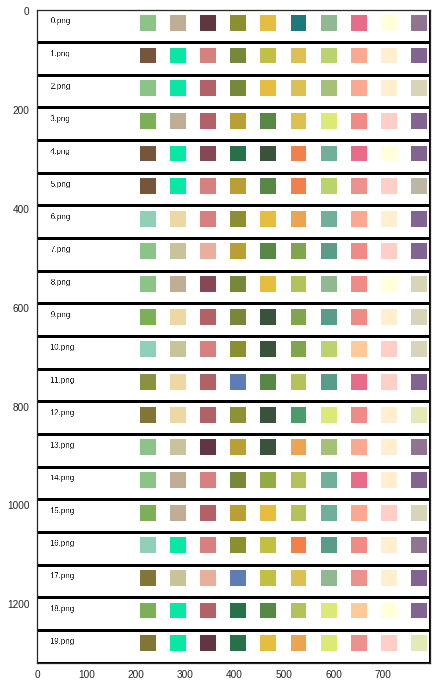

In [38]:
plt.figure(figsize=(8,12))
img = cv2.imread(os.path.join(path,'full_0.png'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))